# SMS Spam Detection Data Cleaning and EDA

## Importing the Libraries
We start by downloading the libraries we will use.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
nltk.download("punkt")
from nltk.corpus import stopwords
stopwords.words("english")
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import timeit
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Create some functions that we will use.

#### Explanation of the `transform_text` & `transform_text_2` Functions

The `transform_text` & `transform_text_2` function performs the following steps:

Converts text to lowercase.

Tokenizes the text into words.

Removes non-alphanumeric characters.

Filters out stopwords and punctuation.

Stems the remaining words.

Returns the cleaned and stemmed text as a single string.

In [2]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " " .join(y)

In [3]:
def transform_text_2(text):
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    filtered_tokens = [word for word in tokens if word.isalnum()]
    
    final_tokens = [word for word in filtered_tokens if word not in stopwords.words("english")]
    
    stemmed_tokens = [ps.stem(word) for word in final_tokens]
    
    return " ".join(stemmed_tokens)

## Importing the Dataset
We begin by loading the dataset and displaying its first few rows:

In [4]:
df = pd.read_csv("spam.csv",encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

#### Output:
- The dataset consists of **5,572** rows and **5** columns.

## Data Cleaning:
* Checkingg for Missing Values

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Observations:
- The dataset contains five columns: `v1`, `v2`, `Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4`.
- The last three columns have many missing values and are unnecessary, so we drop them.

#### Dropping Unnecessary Columns

In [7]:
# Drop cols ["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"]
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


#### Output:
- The dataset now consists of two columns: `v1` (label) and `v2` (message text).

#### Renaming Columns

- `v1` is renamed to `target`.
- `v2` is renamed to `text`.

In [9]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

#### Encoding Target Variable
We convert the `target` column to numerical values where:
- **0** represents `ham` (not spam)
- **1** represents `spam`

In [10]:
encoder = LabelEncoder()
encoder.fit_transform(df["target"])

df["target"] = encoder.fit_transform(df["target"])

In [11]:
df["target"].dtypes

dtype('int32')

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Removing Duplicates

In [13]:
print("Duplicate values before removal:", df.duplicated().sum())
df = df.drop_duplicates(keep="first")
print("Duplicate values after removal:", df.duplicated().sum())

Duplicate values before removal: 403
Duplicate values after removal: 0


#### Observations:
- There were **403** duplicate rows in the dataset, which were removed.
- The dataset now has **5,169** unique rows.

## Exploratory Data Analysis (EDA)

#### Checking Class Distribution

In [14]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

#### Output:
- **4,516** messages are `ham` (non-spam).
- **653** messages are `spam`.

#### Visualizing Class Distribution

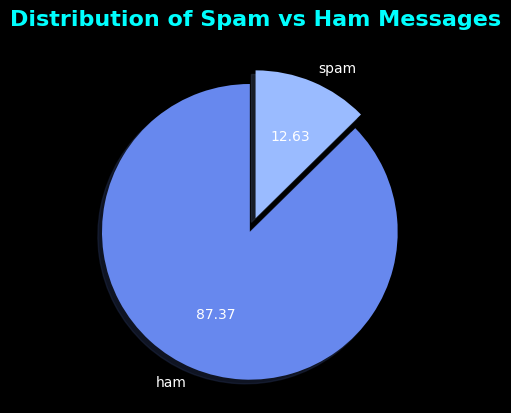

In [132]:
plt.style.use('dark_background')
explode = (0.1, 0)
plt.pie(
    df["target"].value_counts(), 
    labels=["ham", "spam"], 
    autopct="%0.2f", 
    colors=sns.color_palette("coolwarm"),
    explode=explode, 
    shadow=True,
    startangle=90
)
plt.title("Distribution of Spam vs Ham Messages", fontsize=16, color='cyan', fontweight='bold')
plt.show()

#### Observations:
- The dataset is **imbalanced**, with a majority of messages being `ham` (not spam).
- This will be important when training a machine learning model, as class imbalance can impact performance.

#### Creating a "characters_num" Column:

* counts the number of characters in each SMS message.

* saves the character count for each row.

In [16]:
# create a number of charahcters column
df["characters_num"] = df["text"].apply(len)

#### Creating a "words_num" Column  

1. **Tokenize each message** → Splits the text into individual words.  
2. **Count the number of words** → Calculates the total words in each message.  
3. **Store the result in a new column** → Saves the word count for each row.  

Now, the dataset has a new column that shows the number of words in each SMS message.


In [17]:
# create a number of words column
df["text"].apply(lambda x: nltk.word_tokenize(x))
df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["words_num"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

#### Creating a "sentences_num" Column  

1. **Tokenize each message into sentences** → Splits the text into individual sentences.  
2. **Count the number of sentences** → Calculates the total sentences in each message.  
3. **Store the result in a new column** → Saves the sentence count for each row.  

Now, the dataset has a new column that shows the number of sentences in each SMS message.


In [18]:
# create a number of sentences column
df["text"].apply(lambda x: nltk.sent_tokenize(x))
df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df["sentences_num"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

#### Descriptive Statistics for Character, Word, and Sentence Counts 

In [19]:
# descriptive statistics of columns["characters_num","words_num","sentences_num"]
df[["characters_num","words_num","sentences_num"]].describe()

,characters_num,words_num,sentences_num
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Descriptive Statistics for Ham Messages  

In [20]:
# ham descriptive statistics of columns["characters_num","words_num","sentences_num"]
df[df["target"]==0][["characters_num","words_num","sentences_num"]].describe()

,characters_num,words_num,sentences_num
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Descriptive Statistics for Spam Messages  

In [21]:
# spam descriptive statistics of columns["characters_num","words_num","sentences_num"]
df[df["target"]==1][["characters_num","words_num","sentences_num"]].describe()

,characters_num,words_num,sentences_num
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Histogram of SMS Messages by Number of Characters 

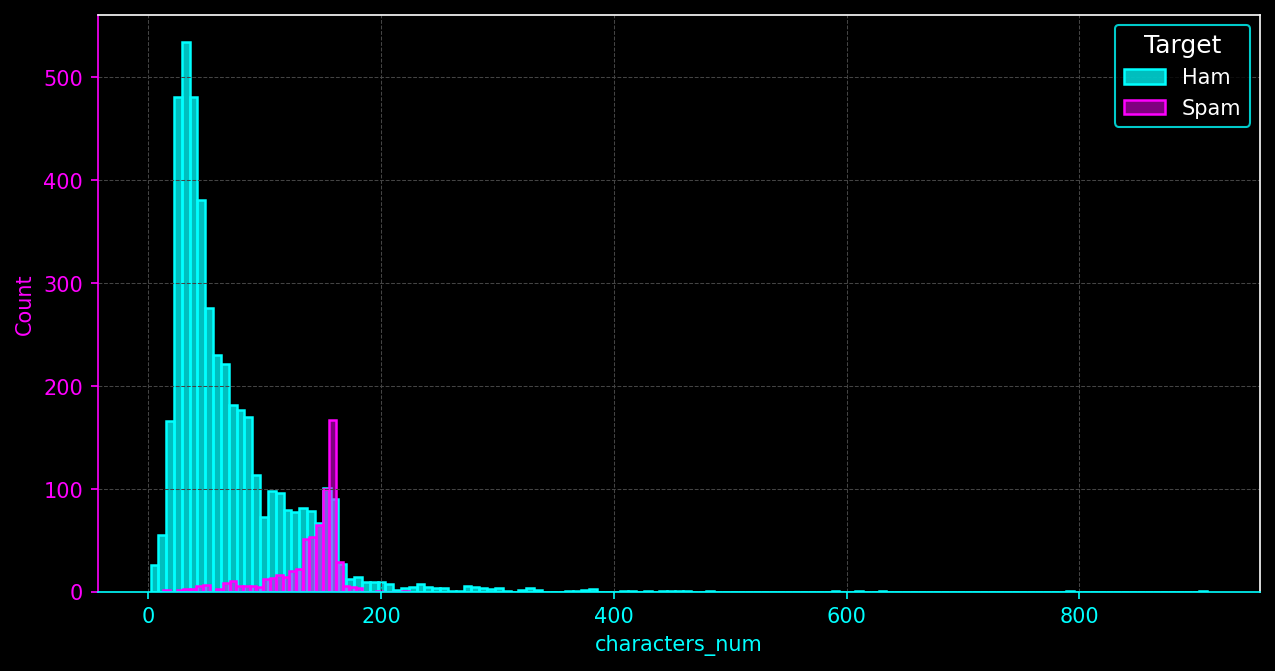

In [120]:
plt.style.use("dark_background")

fig = plt.figure(figsize=(10, 5), dpi=150, facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')  

sns.histplot(df[df["target"] == 0]["characters_num"], color="#00FFFF", edgecolor="#00FFFF", linewidth=1.2)  # Neon Cyan
sns.histplot(df[df["target"] == 1]["characters_num"], color="#FF00FF", edgecolor="#FF00FF", linewidth=1.2, alpha=0.5)  # Neon Magenta

plt.legend(title="Target", labels=["Ham", "Spam"], facecolor="black", edgecolor="#00FFFF", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, color="#444444")

ax.spines['bottom'].set_color('#00FFFF')
ax.spines['left'].set_color('#FF00FF')
ax.xaxis.label.set_color('#00FFFF')
ax.yaxis.label.set_color('#FF00FF')
ax.tick_params(axis='x', colors='#00FFFF')
ax.tick_params(axis='y', colors='#FF00FF')

plt.show()


#### Histogram of SMS Messages by Number of Words

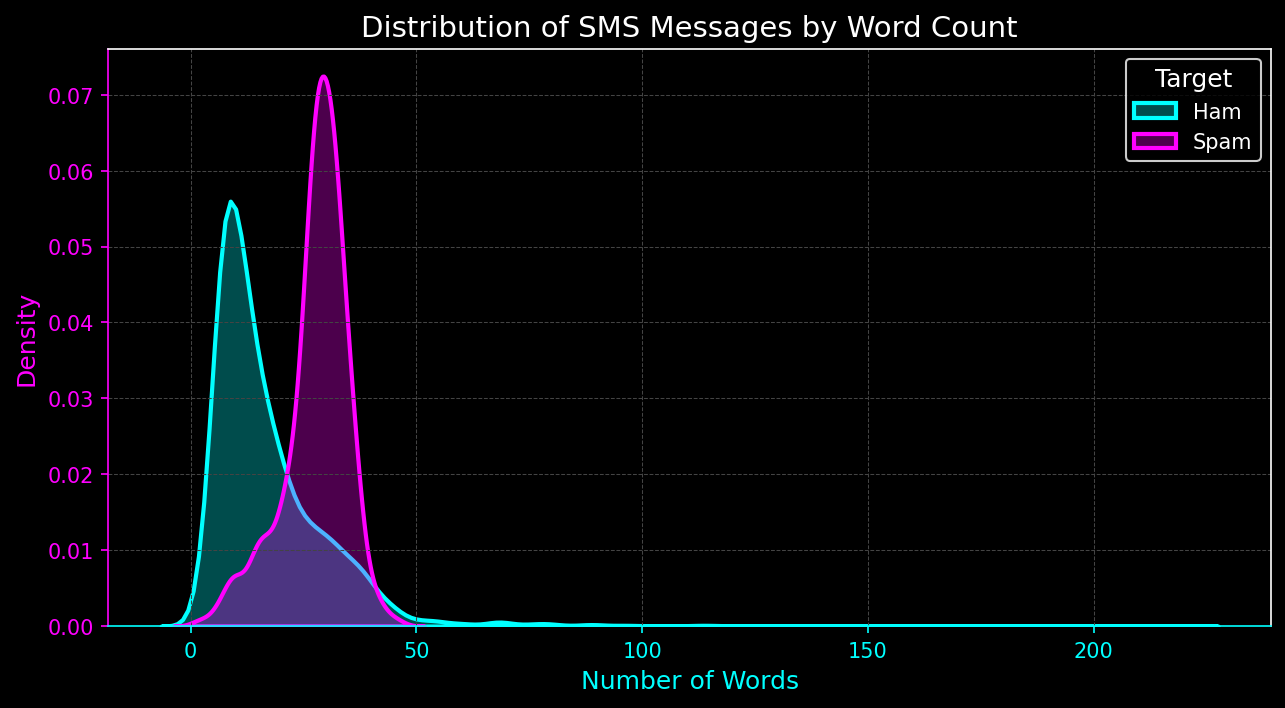

In [121]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 5), dpi=150, facecolor='black')

sns.kdeplot(df[df["target"] == 0]["words_num"], 
            color="#00FFFF", linewidth=2, fill=True, alpha=0.3, label="Ham")

sns.kdeplot(df[df["target"] == 1]["words_num"], 
            color="#FF00FF", linewidth=2, fill=True, alpha=0.3, label="Spam")

plt.legend(title="Target", facecolor="black", edgecolor="white", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, color="#444444")
ax.spines['bottom'].set_color('#00FFFF')
ax.spines['left'].set_color('#FF00FF')
ax.xaxis.label.set_color('#00FFFF')
ax.yaxis.label.set_color('#FF00FF')
ax.tick_params(axis='x', colors='#00FFFF')
ax.tick_params(axis='y', colors='#FF00FF')
plt.title("Distribution of SMS Messages by Word Count", color="white", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

#### Histogram of SMS Messages by Number of Sentences 

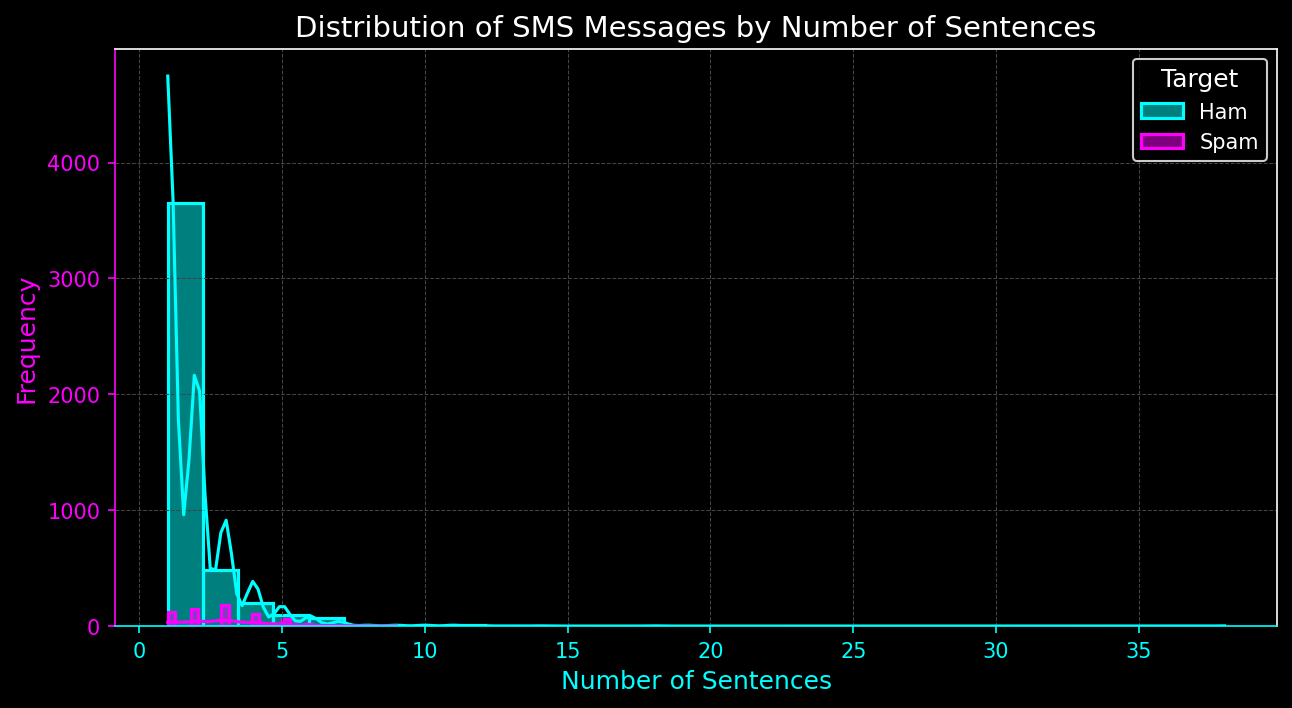

In [122]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 5), dpi=150, facecolor='black')

sns.histplot(df[df["target"] == 0]["sentences_num"], color="#00FFFF", edgecolor="#00FFFF", bins=30, alpha=0.5, linewidth=1.5, kde=True, label="Ham")
sns.histplot(df[df["target"] == 1]["sentences_num"], color="#FF00FF", edgecolor="#FF00FF", bins=30, alpha=0.5, linewidth=1.5, kde=True, label="Spam")

plt.legend(title="Target", facecolor="black", edgecolor="white", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, color="#444444")
ax.spines['bottom'].set_color('#00FFFF')
ax.spines['left'].set_color('#FF00FF')
ax.xaxis.label.set_color('#00FFFF')
ax.yaxis.label.set_color('#FF00FF')
ax.tick_params(axis='x', colors='#00FFFF')
ax.tick_params(axis='y', colors='#FF00FF')
plt.title("Distribution of SMS Messages by Number of Sentences", color="white", fontsize=14)
plt.xlabel("Number of Sentences", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

#### Pairplot of Features Colored by `Target`
- **Creates a pairplot** to visualize relationships between all pairs of features in the DataFrame.

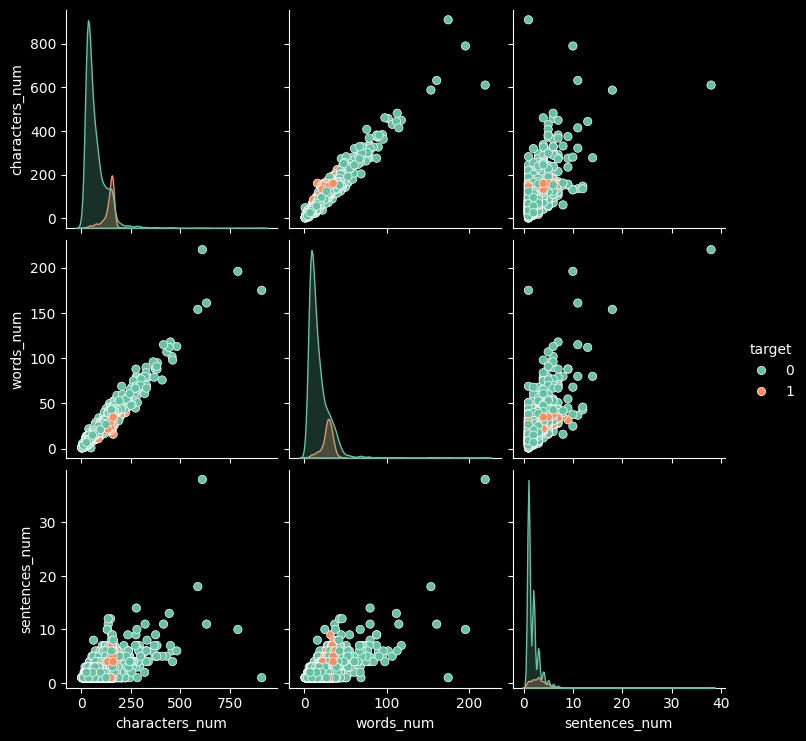

In [126]:
sns.pairplot(df,hue="target",palette="Set2")

#### Correlation of Features in the DataFrame

In [26]:
# correlation
df.corr(numeric_only=True)

,target,characters_num,words_num,sentences_num
target,1.000000,0.384717,0.262912,0.263939
characters_num,0.384717,1.000000,0.965760,0.624139
words_num,0.262912,0.965760,1.000000,0.679971
sentences_num,0.263939,0.624139,0.679971,1.000000


#### Heatmap Showing Correlation Between Features

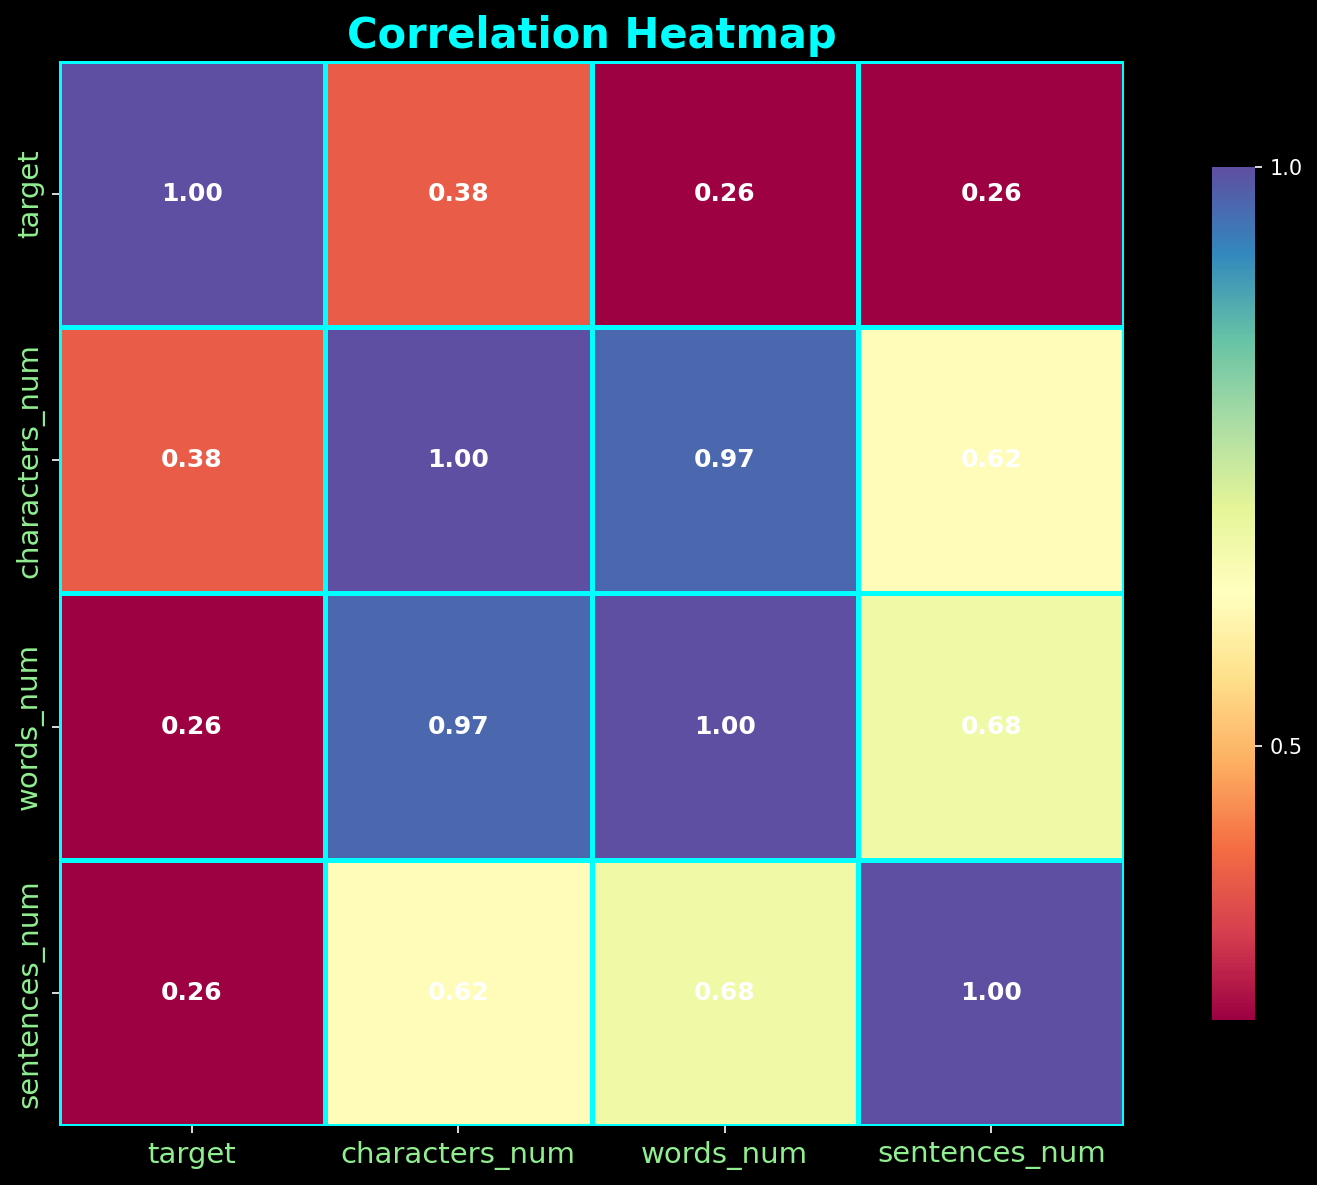

In [136]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(
    df.corr(numeric_only=True),
    cmap='Spectral',annot=True,fmt='.2f',
    annot_kws={"size": 12, "weight": "bold", "color": "white"},
    linewidths=1.5,linecolor='cyan',
    cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [0, 0.5, 1]},
    square=True
)
plt.title("Correlation Heatmap", fontsize=20, color='cyan', fontweight='bold', loc='center')
plt.xticks(fontsize=14, color='lightgreen', fontweight='light')
plt.yticks(fontsize=14, color='lightgreen', fontweight='light')
plt.tight_layout()
plt.show()

---
## Data Preprocessing
---

In [28]:
ps = PorterStemmer()

#### Measuring the Runtime of Two Text Transformation Functions (`transform_text`,`transform_text_2`)

In [29]:
import timeit

time1 = timeit.timeit(lambda: df["text"].apply(transform_text),number=1)

time2 = timeit.timeit(lambda: df["text"].apply(transform_text_2),number=1)

print(f"Runtime for transform_text: {time1:.5f} seconds")
print(f"Runtime for transform_text_2: {time2:.5f} seconds")

Runtime for transform_text: 32.45964 seconds
Runtime for transform_text_2: 41.47611 seconds


In [30]:
df["transformed_text"] = df["text"].apply(transform_text_2)

#### Creating a WordCloud Object

In [31]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

#### Generating and Displaying a WordCloud for Spam Text

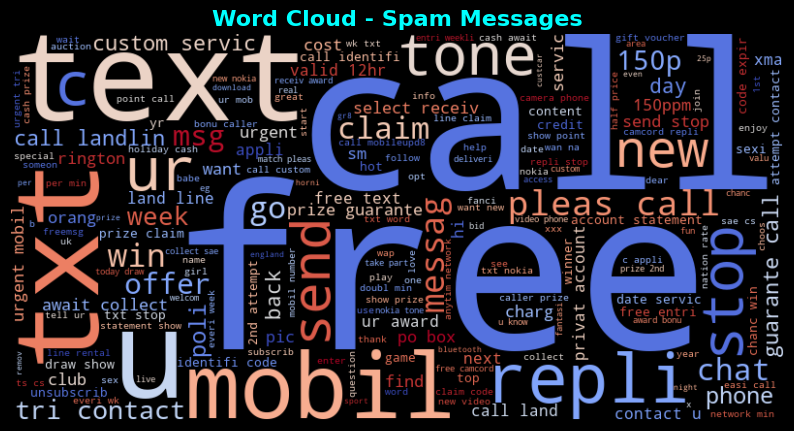

In [133]:
spam_wc = WordCloud(
    background_color="black",
    colormap="coolwarm",
    contour_color="cyan",
    contour_width=1,
    width=800,
    height=400,
    max_words=200,
    random_state=42
).generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Spam Messages", fontsize=16, color='cyan', fontweight='bold')
plt.show()

#### Generating and Displaying a WordCloud for Ham Text

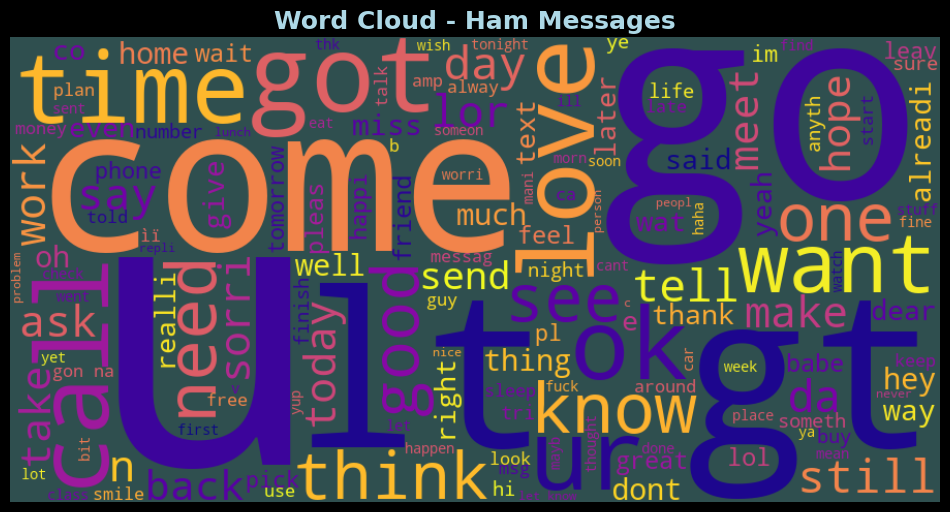

In [134]:
ham_wc = WordCloud(
    background_color="darkslategray",
    colormap="plasma",
    contour_color="white",
    contour_width=2,
    width=900,
    height=450,
    max_words=150,
    random_state=42,
    min_font_size=10
).generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

plt.figure(figsize=(12, 7))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Ham Messages", fontsize=18, color='lightblue', fontweight='bold')
plt.show()

#### Creating a Corpus of Words from Spam Texts

In [34]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [35]:
len(spam_corpus)

9939

In [36]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

#### Displaying the 30 Most Common Words in Spam Texts

In [37]:
# convert spam_corpus to Dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


#### Bar Graph for the Most Popular Words in Spam Corpus

C:\Users\Hp\AppData\Local\Temp\ipykernel_11288\2134675505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


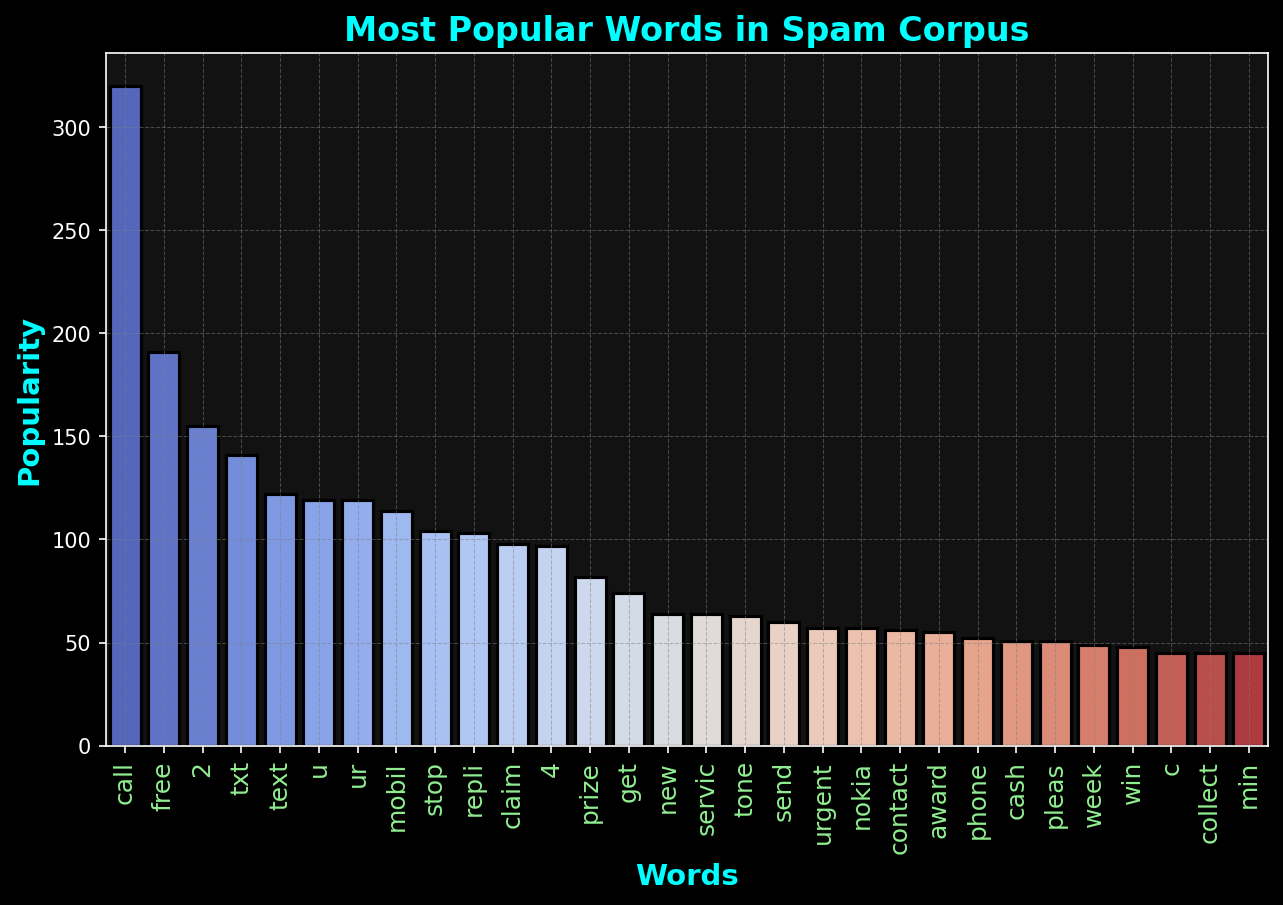

In [130]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
    palette="coolwarm", linewidth=1.5, edgecolor='black' 
)
plt.xlabel("Words", fontsize=14, color='cyan', fontweight='bold')
plt.ylabel("Popularity", fontsize=14, color='cyan', fontweight='bold')
plt.title("Most Popular Words in Spam Corpus", fontsize=16, color='cyan', fontweight='bold')
plt.xticks(rotation=90, color='lightgreen', fontsize=12, fontweight='light')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().patch.set_facecolor('#121212')

plt.show()

#### Creating a Corpus of Words from Ham Texts

In [39]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [40]:
len(ham_corpus)

35404

#### Displaying the 30 Most Common Words in Ham Texts

In [41]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


#### Bar Graph for the Most Popular Words in Ham Corpus

C:\Users\Hp\AppData\Local\Temp\ipykernel_11288\4238610826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


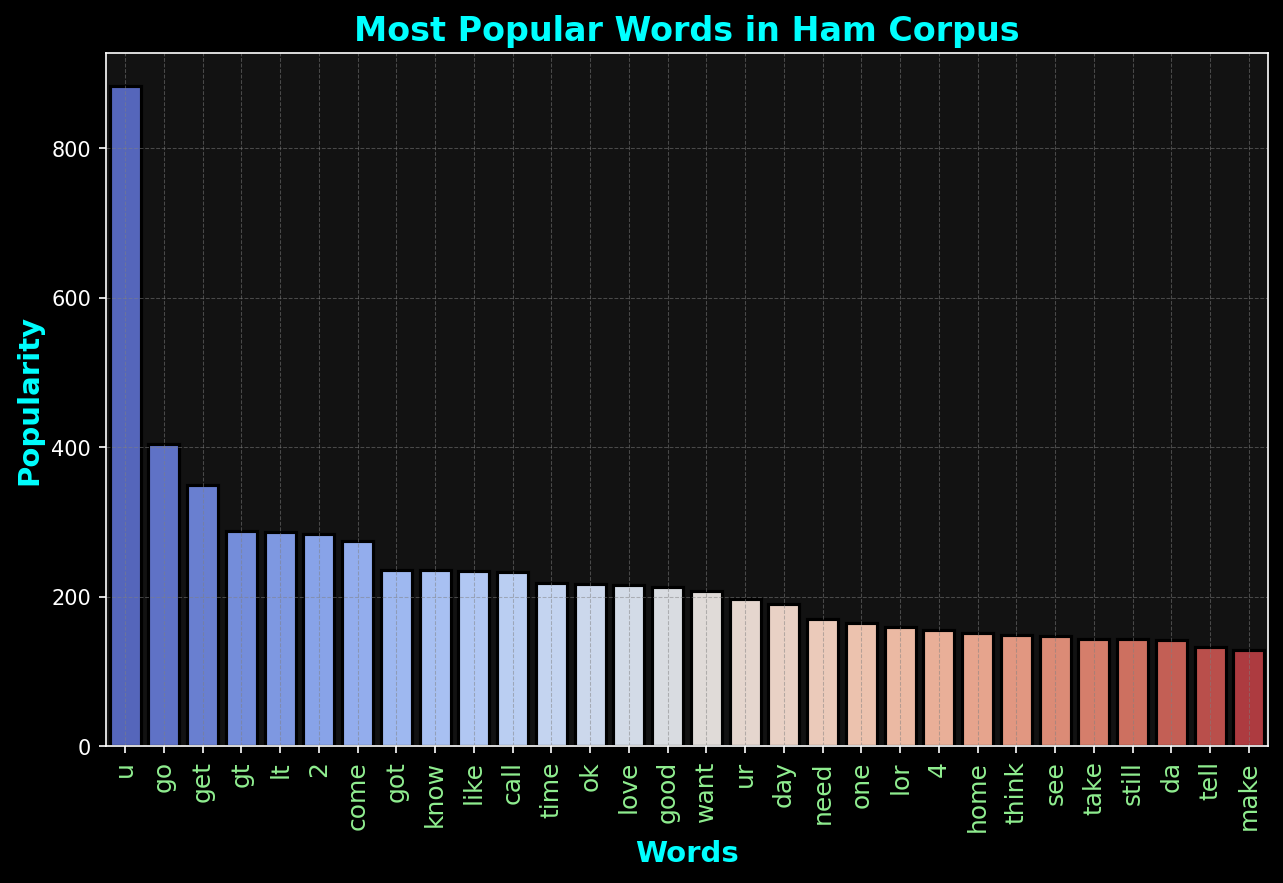

In [129]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
    palette="coolwarm", linewidth=1.5, edgecolor='black'
)
plt.xlabel("Words", fontsize=14, color='cyan', fontweight='bold')
plt.ylabel("Popularity", fontsize=14, color='cyan', fontweight='bold')
plt.title("Most Popular Words in Ham Corpus", fontsize=16, color='cyan', fontweight='bold')
plt.xticks(rotation=90, color='lightgreen', fontsize=12, fontweight='light')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().patch.set_facecolor('#121212')
plt.show()

---
## Model Building 
---

#### Initializing a CountVectorizer
transform raw text data into numerical features

In [43]:
cv = CountVectorizer()

#### Transforming Text Data into Numerical Features
transforms the text data into a matrix of word counts and shows the dimensions of the resulting feature matrix

In [44]:
X = cv.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [45]:
y = df["target"].values
y.shape

(5169,)

#### Splitting Data into Training and Test Sets

In [46]:
# Train , Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Training and Evaluating a Gaussian Naive Bayes Classifier

In [47]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


#### Training and Evaluating a Multinomial Naive Bayes Classifier

In [48]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


#### Training and Evaluating a Bernoulli Naive Bayes Classifier

In [49]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


#### Initializing a Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer (TfidfVectorizer)

In [50]:
tfidf = TfidfVectorizer()

#### Transforming Text Data into TF-IDF Features

In [51]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [52]:
y = df["target"].values
y.shape

(5169,)

In [53]:
# Train , Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [55]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [56]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Initializing Various Machine Learning Classifiers

In [57]:
svc = SVC(kernel="sigmoid",gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear",penalty="l1")
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2,algorithm="SAMME")
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

#### Storing Classifiers in a Dictionary

In [58]:
clfs = {
    "SVC":svc,
    "KN" :knc,
    "NB" :mnb,
    "DT" :dtc,
    "LR" :lrc,
    "RF" :rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}

#### Training a Classifier

#### Explanation of the `train_classifier` Function
The `train_classifier` function performs the following steps:

Trains a classifier on the training data.

Predicts labels for the test data.

Evaluates the classifier's performance using accuracy and precision.

Returns the calculated metrics.

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy,precision

In [60]:
# train classfier
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9729498675271409)

#### Evaluating Multiple Classifiers
This loop evaluates the performance of multiple classifiers stored in the `clfs` dictionary, prints their accuracy and precision scores, and stores them in lists for later comparison.

In [61]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For: ",name)
    print("accuracy: ",current_accuracy)
    print("precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
accuracy:  0.9729206963249516
precision:  0.9729498675271409
For:  KN
accuracy:  0.9003868471953579
precision:  0.9106572723594
For:  NB
accuracy:  0.9593810444874274
precision:  0.9611998036894829
For:  DT
accuracy:  0.9352030947775629
precision:  0.9317536230116675
For:  LR
accuracy:  0.9516441005802708
precision:  0.9511703577301099
For:  RF
accuracy:  0.971953578336557
precision:  0.9728328715562758
For:  AdaBoost
accuracy:  0.9245647969052224
precision:  0.9201432479625093
For:  BgC
accuracy:  0.9584139264990329
precision:  0.9576711473777019
For:  ETC
accuracy:  0.9729206963249516
precision:  0.9731694470386715
For:  GBDT
accuracy:  0.9526112185686654
precision:  0.9515881228452513
For:  xgb
accuracy:  0.9729206963249516
precision:  0.9724688146445182


#### Creating a DataFrame for Classifier Performance

In [62]:
# create a dataframe for algorithms performace
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores})

In [63]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.972950
1,KN,0.900387,0.910657
2,NB,0.959381,0.961200
3,DT,0.935203,0.931754
4,LR,0.951644,0.951170
5,RF,0.971954,0.972833
6,AdaBoost,0.924565,0.920143
7,BgC,0.958414,0.957671
8,ETC,0.972921,0.973169
9,GBDT,0.952611,0.951588


In [64]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [65]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.935203
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.924565
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.972921
9,GBDT,Accuracy,0.952611


#### Visualizing Classifier Performance (Accuracy and Precision)

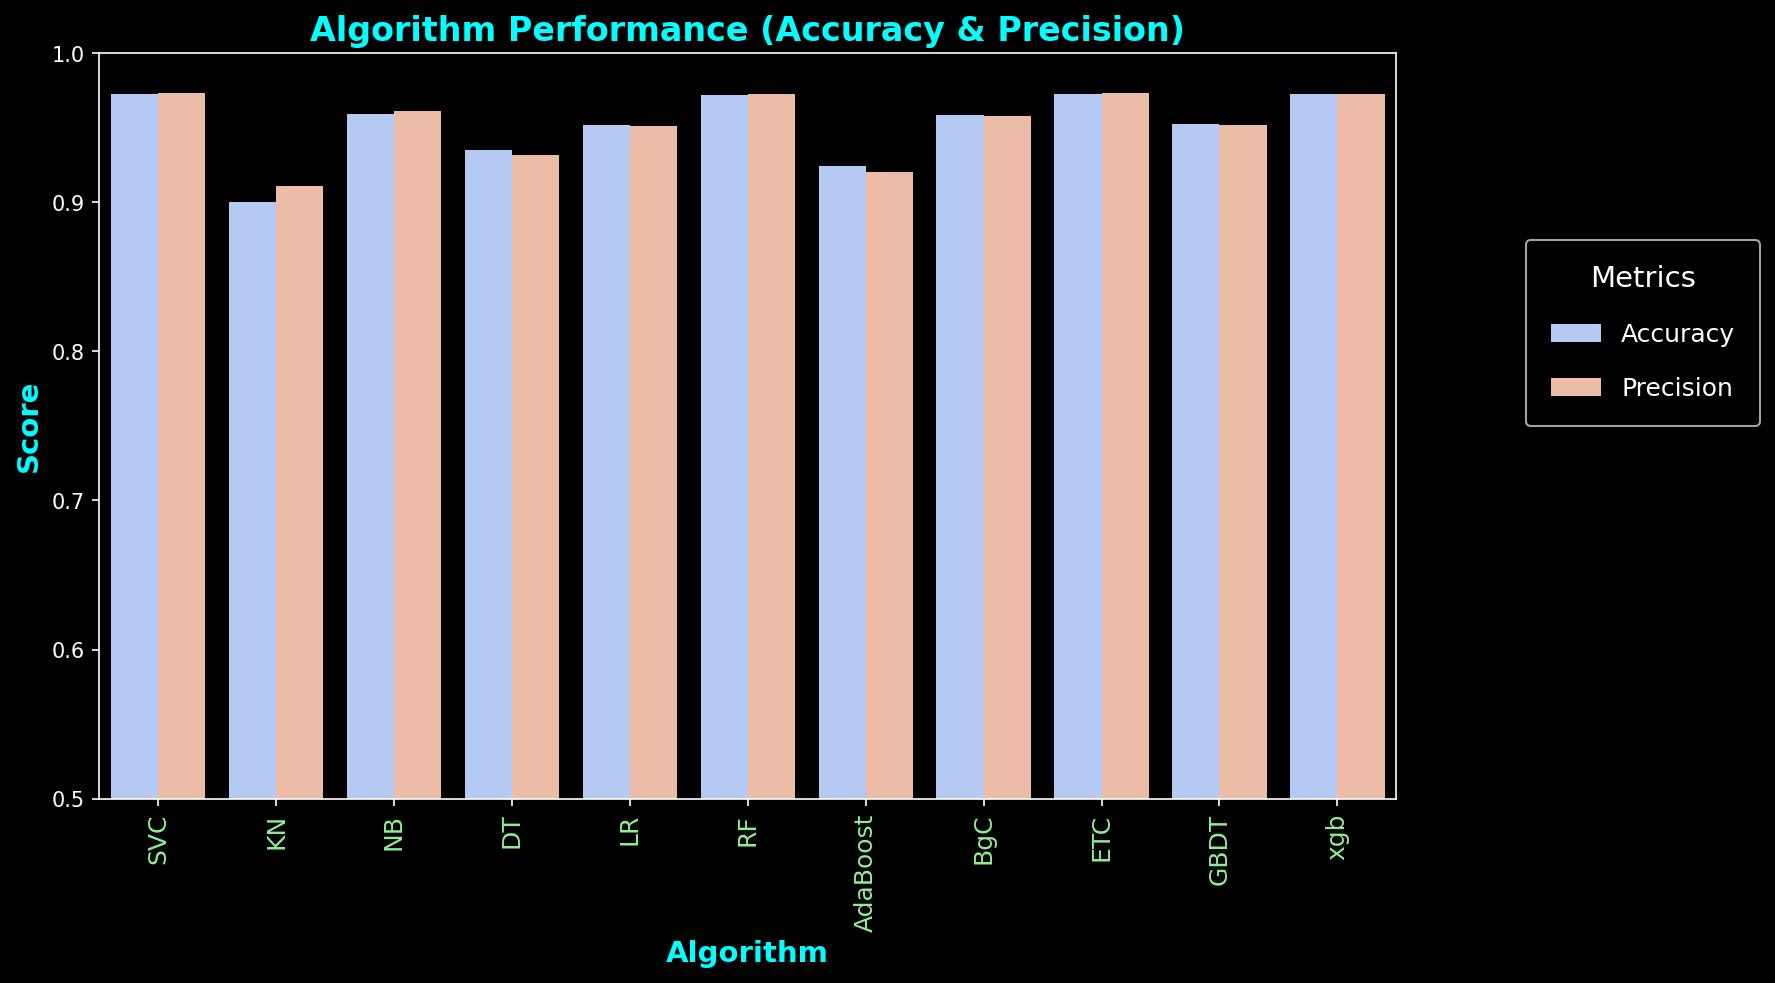

In [131]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(data=performance_df1, x="Algorithm", y="value", hue="variable", palette="coolwarm")
plt.xlabel("Algorithm", fontsize=14, color='cyan', fontweight='bold')
plt.ylabel("Score", fontsize=14, color='cyan', fontweight='bold')
plt.title("Algorithm Performance (Accuracy & Precision)", fontsize=16, color='cyan', fontweight='bold')
plt.legend(loc=(1.1, 0.5), fontsize=12, title='Metrics', title_fontsize=14, labelspacing=1.2, borderpad=1)
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.xticks(rotation=90, color='lightgreen', fontsize=12, fontweight='light')
plt.show()

---
## Model Improve
---

#### Changing `max_features` in TF-IDF Vectorizer

In [106]:
# Change max_features parameter of TfIdf
tfidf = TfidfVectorizer(max_features=3000)

#### Creating a DataFrame for Classifier Performance with `max_features=3000`

In [107]:
temp_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_max_ft_3000": accuracy_scores, "Precision_max_ft_3000": precision_scores})

In [108]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.866538,0.884350
1,KN,0.885880,0.880228
2,NB,0.973888,0.973515
3,DT,0.945841,0.943805
4,LR,0.965184,0.964907
5,RF,0.969052,0.969439
6,AdaBoost,0.946809,0.945158
7,BgC,0.966151,0.965485
8,ETC,0.978723,0.978665
9,GBDT,0.950677,0.949884


#### Merging DataFrames to Combine Results

In [109]:
# merge Dataframes
new_df_max_ft = performance_df.merge(temp_df,on="Algorithm")
new_df_max_ft

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.972950,0.866538,0.884350
1,KN,0.900387,0.910657,0.885880,0.880228
2,NB,0.959381,0.961200,0.973888,0.973515
3,DT,0.935203,0.931754,0.945841,0.943805
4,LR,0.951644,0.951170,0.965184,0.964907
5,RF,0.971954,0.972833,0.969052,0.969439
6,AdaBoost,0.924565,0.920143,0.946809,0.945158
7,BgC,0.958414,0.957671,0.966151,0.965485
8,ETC,0.972921,0.973169,0.978723,0.978665
9,GBDT,0.952611,0.951588,0.950677,0.949884


#### Applying TF-IDF Vectorization to the Text Data

In [110]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

#### Initializing Min-Max Scaler

In [111]:
scaler = MinMaxScaler()

#### Scaling Features and Extracting Target Labels

In [112]:
X = scaler.fit_transform(X)
y = df["target"].values

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [116]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [77]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [78]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For: ",name)
    print("accuracy: ",current_accuracy)
    print("precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
accuracy:  0.9690522243713733
precision:  0.9684117186862554
For:  KN
accuracy:  0.9052224371373307
precision:  0.9120903118844093
For:  NB
accuracy:  0.9787234042553191
precision:  0.9784351780774301
For:  DT
accuracy:  0.9294003868471954
precision:  0.9251826491102858
For:  LR
accuracy:  0.9671179883945842
precision:  0.9670381194934664
For:  RF
accuracy:  0.9758220502901354
precision:  0.9759842777546205
For:  AdaBoost
accuracy:  0.9245647969052224
precision:  0.9204109629860762
For:  BgC
accuracy:  0.9584139264990329
precision:  0.957516941029288
For:  ETC
accuracy:  0.9748549323017408
precision:  0.9748488479979133
For:  GBDT
accuracy:  0.9468085106382979
precision:  0.9456565886421389
For:  xgb
accuracy:  0.9671179883945842
precision:  0.9664006466367269


#### Creating a DataFrame for Scaled Classifier Performance

In [79]:
temp_df_scaled = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_scaled":accuracy_scores,"Precision_scaled":precision_scores})

In [80]:
temp_df_scaled

,Algorithm,Accuracy_scaled,Precision_scaled
0,SVC,0.969052,0.968412
1,KN,0.905222,0.912090
2,NB,0.978723,0.978435
3,DT,0.929400,0.925183
4,LR,0.967118,0.967038
5,RF,0.975822,0.975984
6,AdaBoost,0.924565,0.920411
7,BgC,0.958414,0.957517
8,ETC,0.974855,0.974849
9,GBDT,0.946809,0.945657


#### Merging DataFrames to Combine Results with Scaled Features

In [81]:
# Merge Dataframes
new_df_scaled = new_df_max_ft.merge(temp_df_scaled,on="Algorithm")

In [82]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaled,Precision_scaled
0,SVC,0.972921,0.972950,0.972921,0.972950,0.969052,0.968412
1,KN,0.900387,0.910657,0.900387,0.910657,0.905222,0.912090
2,NB,0.959381,0.961200,0.959381,0.961200,0.978723,0.978435
3,DT,0.935203,0.931754,0.935203,0.931754,0.929400,0.925183
4,LR,0.951644,0.951170,0.951644,0.951170,0.967118,0.967038
5,RF,0.971954,0.972833,0.971954,0.972833,0.975822,0.975984
6,AdaBoost,0.924565,0.920143,0.924565,0.920143,0.924565,0.920411
7,BgC,0.958414,0.957671,0.958414,0.957671,0.958414,0.957517
8,ETC,0.972921,0.973169,0.972921,0.973169,0.974855,0.974849
9,GBDT,0.952611,0.951588,0.952611,0.951588,0.946809,0.945657


#### Adding the Number of Characters as an Additional Feature

In [83]:
X = np.hstack((X,df["characters_num"].values.reshape(-1,1)))
X.shape

(5169, 3001)

In [84]:
y = df["target"].values
y.shape

(5169,)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8907156673114119
[[800  96]
 [ 17 121]]
0.5576036866359447


In [104]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9738878143133463
[[890   6]
 [ 21 117]]
0.9512195121951219


In [88]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [89]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For: ",name)
    print("accuracy: ",current_accuracy)
    print("precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
accuracy:  0.8665377176015474
precision:  0.8843498984245517
For:  KN
accuracy:  0.8858800773694391
precision:  0.8802276387679455
For:  NB
accuracy:  0.9738878143133463
precision:  0.9735145711390615
For:  DT
accuracy:  0.9458413926499033
precision:  0.9438052223112925
For:  LR
accuracy:  0.965183752417795
precision:  0.9649066462913559
For:  RF
accuracy:  0.9690522243713733
precision:  0.9694390715667313
For:  AdaBoost
accuracy:  0.9468085106382979
precision:  0.945158289236829
For:  BgC
accuracy:  0.9661508704061895
precision:  0.9654853073367512
For:  ETC
accuracy:  0.9787234042553191
precision:  0.9786652714800603
For:  GBDT
accuracy:  0.9506769825918762
precision:  0.9498844801357744
For:  xgb
accuracy:  0.9690522243713733
precision:  0.968512902666029


#### Creating a DataFrame for Classifier Performance with Number of Characters Feature

In [90]:
df_num_chars = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_num_chars":accuracy_scores,"Precision_num_chars":precision_scores})

In [91]:
df_num_chars

,Algorithm,Accuracy_num_chars,Precision_num_chars
0,SVC,0.866538,0.884350
1,KN,0.885880,0.880228
2,NB,0.973888,0.973515
3,DT,0.945841,0.943805
4,LR,0.965184,0.964907
5,RF,0.969052,0.969439
6,AdaBoost,0.946809,0.945158
7,BgC,0.966151,0.965485
8,ETC,0.978723,0.978665
9,GBDT,0.950677,0.949884


#### Merging DataFrames to Combine Results with Number of Characters Feature

In [92]:
# Merge Dataframes
new_df_scaled_chars = new_df_scaled.merge(df_num_chars,on="Algorithm")

In [93]:
new_df_scaled_chars

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaled,Precision_scaled,Accuracy_num_chars,Precision_num_chars
0,SVC,0.972921,0.972950,0.972921,0.972950,0.969052,0.968412,0.866538,0.884350
1,KN,0.900387,0.910657,0.900387,0.910657,0.905222,0.912090,0.885880,0.880228
2,NB,0.959381,0.961200,0.959381,0.961200,0.978723,0.978435,0.973888,0.973515
3,DT,0.935203,0.931754,0.935203,0.931754,0.929400,0.925183,0.945841,0.943805
4,LR,0.951644,0.951170,0.951644,0.951170,0.967118,0.967038,0.965184,0.964907
5,RF,0.971954,0.972833,0.971954,0.972833,0.975822,0.975984,0.969052,0.969439
6,AdaBoost,0.924565,0.920143,0.924565,0.920143,0.924565,0.920411,0.946809,0.945158
7,BgC,0.958414,0.957671,0.958414,0.957671,0.958414,0.957517,0.966151,0.965485
8,ETC,0.972921,0.973169,0.972921,0.973169,0.974855,0.974849,0.978723,0.978665
9,GBDT,0.952611,0.951588,0.952611,0.951588,0.946809,0.945657,0.950677,0.949884


#### Initializing Classifiers for Voting Classifier
These three classifiers will be used in a **Voting Classifier** to combine their predictions for improved accuracy.

In [94]:
# Voting Classifier
svc = SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

#### Initializing Voting Classifier

In [95]:
voting = VotingClassifier(estimators=[("svm",svc),("nb",mnb),("et",etc)],voting="soft")

In [96]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

#### Making Predictions with the Voting Classifier

In [97]:
y_pred = voting.predict(X_test)

In [98]:
print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision: ",precision_score(y_test,y_pred))

accuracy:  0.9738878143133463
precision:  1.0


#### Initializing Estimators for Stacking

In [99]:
# Applaying stacking
estimators = [("svm",svc),("nb",mnb),("et",etc)]

#### Initializing the Final Estimator for Stacking

In [100]:
final_estimator = RandomForestClassifier()

#### Applying Stacking Classifier

In [101]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [102]:
print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision: ",precision_score(y_test,y_pred))

accuracy:  0.9816247582205029
precision:  0.968503937007874


#### Saving the Model and Vectorizer using Pickle

In [117]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))